18 cars passing a certain tollboth at different time of the day (x) with different speed (y)

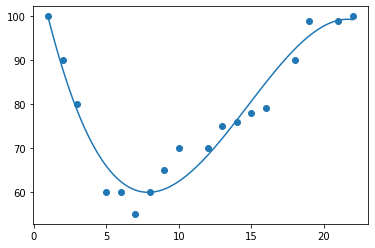

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

#NumPy has a method that lets us make a polynomial model
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

#specify how the line will display, we start at position 1, and end at position 22
myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related

In [ ]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451027


## Predict Future Values

Let us try to predict the speed of a car that passes the tollbooth at around 17 P.M

In [ ]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)
print(speed)

88.87331269697987


![img_polynomial_prediction.png](attachment:img_polynomial_prediction.png)

Descriptive Statistics:
Number of data points: 18
Average speed: 78.11111111111111
Median speed: 77.0
Minimum speed: 55
Maximum speed: 100
Speed standard deviation: 14.820739556029393


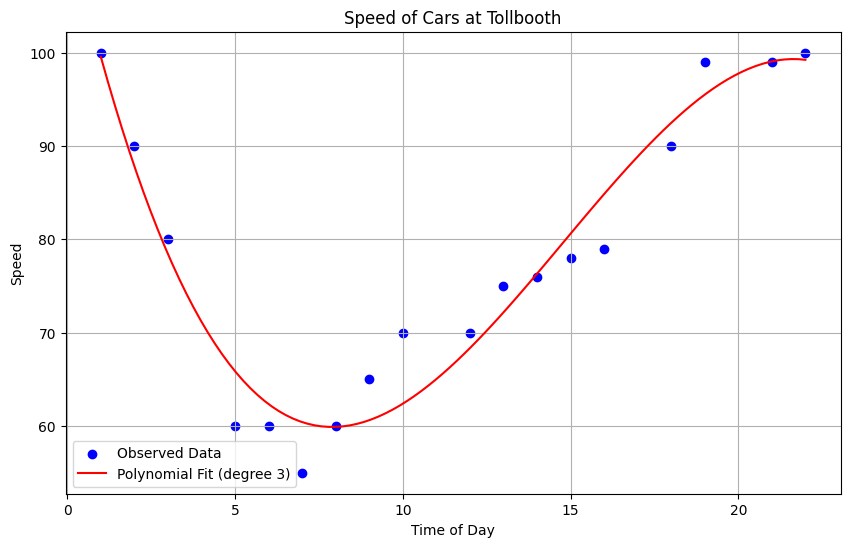

R-squared: 0.9432150416451026
Predicted speed at 17: 88.87331269698001


In [1]:
# prompt: do an EDA

import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data provided
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# EDA: Descriptive Statistics
print("Descriptive Statistics:")
print(f"Number of data points: {len(x)}")
print(f"Average speed: {numpy.mean(y)}")
print(f"Median speed: {numpy.median(y)}")
print(f"Minimum speed: {min(y)}")
print(f"Maximum speed: {max(y)}")
print(f"Speed standard deviation: {numpy.std(y)}")

# EDA: Visualization - Scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Observed Data', color='blue')

# Polynomial regression model
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) # Degree 3 polynomial
myline = numpy.linspace(min(x), max(x), 100) # Create x values for the trendline

plt.plot(myline, mymodel(myline), color='red', label='Polynomial Fit (degree 3)')
plt.xlabel("Time of Day")
plt.ylabel("Speed")
plt.title("Speed of Cars at Tollbooth")
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model
r2 = r2_score(y, mymodel(x))
print(f"R-squared: {r2}")

# Prediction
speed = mymodel(17)
print(f"Predicted speed at 17: {speed}")

Correlation coefficient: 0.42698508029462445


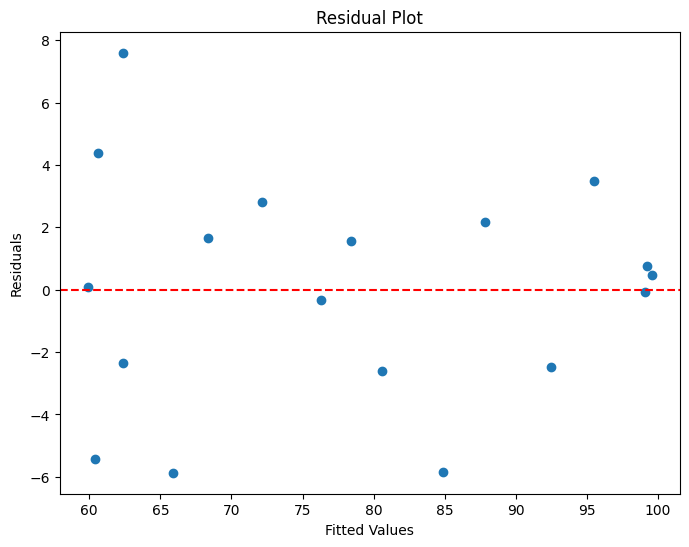

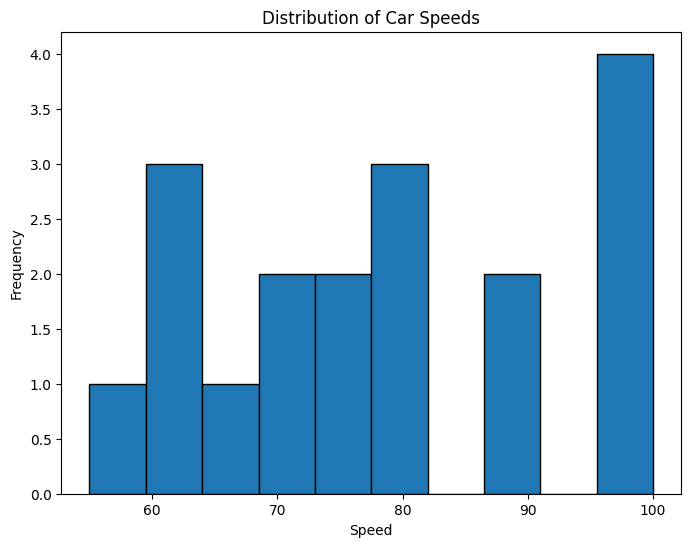

R-squared Scores for different degrees: [0.18231625879420688, 0.759777160189589, 0.9432150416451026, 0.9542030834699505, 0.9568460139893518]


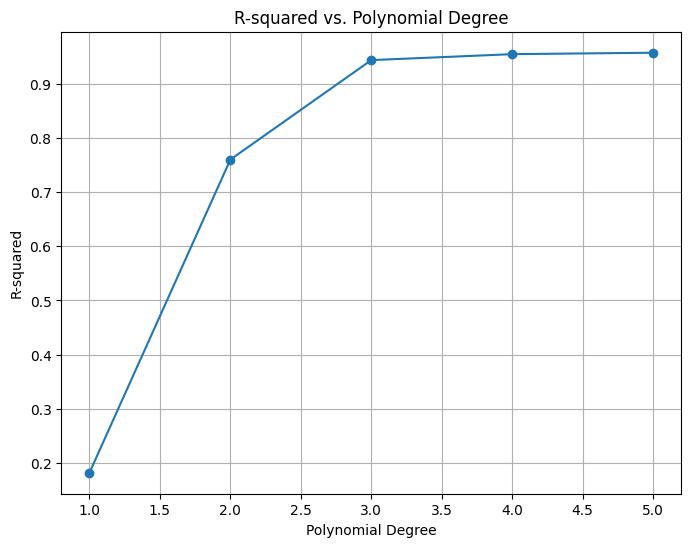

In [2]:
# prompt: analyze further EDA points that were not part of the last prompt

import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data provided
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# EDA:  Correlation Analysis
correlation_coefficient = numpy.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")


# EDA: Residual Analysis
residuals = y - mymodel(x)

plt.figure(figsize=(8, 6))
plt.scatter(mymodel(x), residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Check for heteroscedasticity (non-constant variance of residuals)
# and other patterns in the residuals plot. Ideally, residuals should be randomly scattered around zero

# EDA:  Distribution of Speed
plt.figure(figsize=(8, 6))
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.title("Distribution of Car Speeds")
plt.show()


#Investigate different polynomial degrees
degrees = [1, 2, 3, 4, 5]
r2_scores = []
for degree in degrees:
    mymodel = numpy.poly1d(numpy.polyfit(x,y,degree))
    r2_scores.append(r2_score(y, mymodel(x)))
print(f"R-squared Scores for different degrees: {r2_scores}")

#Plot R-squared vs degree
plt.figure(figsize=(8,6))
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("R-squared")
plt.title("R-squared vs. Polynomial Degree")
plt.grid(True)
plt.show()

#Further analysis can be done here with outlier detection, data transformation etc.

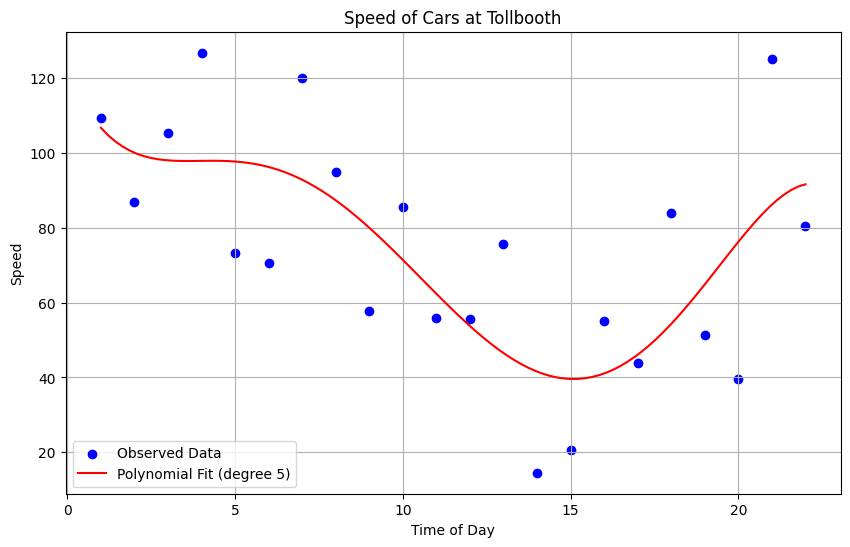

Evaluation Metrics:
R-squared: 0.5199328123637965
Predicted speed at x=17: 46.06718059626441
Correlation coefficient: -0.422856274122185


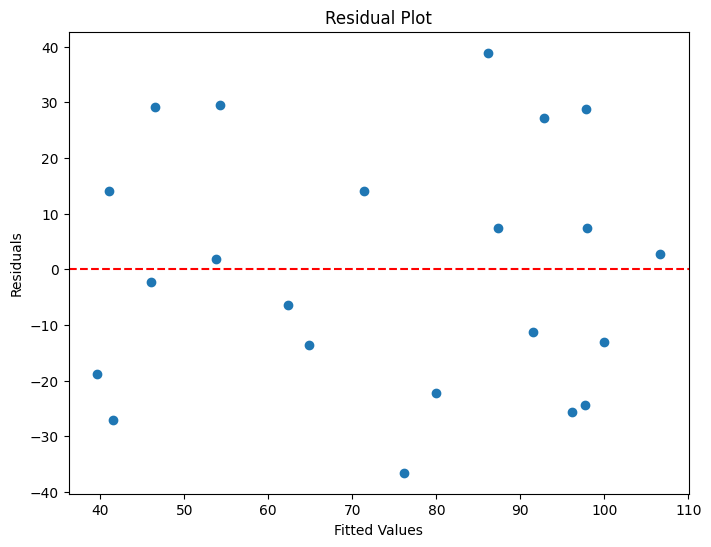

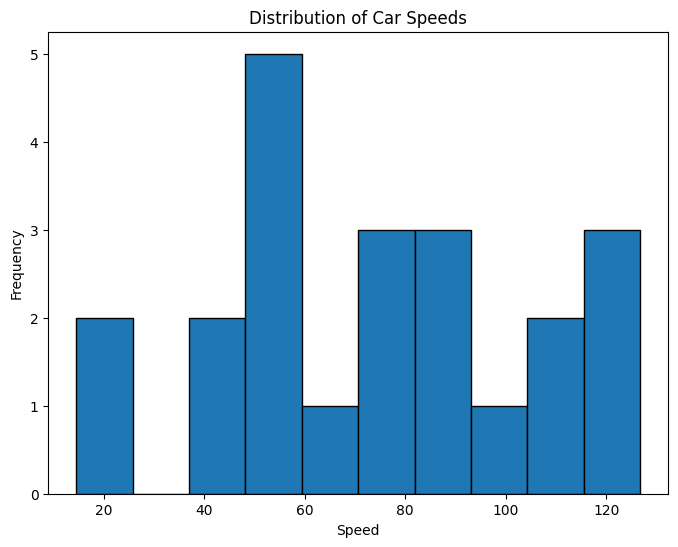

In [6]:
# prompt: change variables as needed to observe how the change in data points impacts correlation and regression.

import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Interactive sliders for data points modification
x_data_points = 22 #@param {type:"slider", min:5, max:30, step:1}
x_noise_level = 0.3 #@param {type:"slider", min:0.0, max:1.0, step:0.05}
polynomial_degree = 5 #@param {type:"slider", min:1, max:5, step:1}


# Generate synthetic data with adjustable noise
numpy.random.seed(42) # for reproducibility
x = numpy.linspace(1, 22, x_data_points)
y_original = 100 - 5*x + 0.2*x**2  # Original trend

# Add noise according to noise level
noise = numpy.random.normal(0, x_noise_level * numpy.max(y_original), x_data_points)
y = y_original + noise

# Polynomial regression
mymodel = numpy.poly1d(numpy.polyfit(x, y, polynomial_degree))
myline = numpy.linspace(1, 22, 100)

# Scatter plot and trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Observed Data', color='blue')
plt.plot(myline, mymodel(myline), color='red', label=f'Polynomial Fit (degree {polynomial_degree})')

plt.xlabel("Time of Day")
plt.ylabel("Speed")
plt.title("Speed of Cars at Tollbooth")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
print("Evaluation Metrics:")
r2 = r2_score(y, mymodel(x))
print(f"R-squared: {r2}")

speed = mymodel(17)
print(f"Predicted speed at x=17: {speed}")

# Additional EDA
correlation_coefficient = numpy.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

residuals = y - mymodel(x)

plt.figure(figsize=(8, 6))
plt.scatter(mymodel(x), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of speed
plt.figure(figsize=(8, 6))
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.title("Distribution of Car Speeds")
plt.show()